In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [45]:
df = pd.read_csv("Bank_Loan_Data.csv")

In [46]:
df.head()

,Unnamed: 0,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_income_type,name_education_type,name_family_status,name_housing_type,occupation_type,days_employed,cnt_fam_members,organization_type
0,0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,-637,1.0,Business Entity Type 3
1,1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,Core staff,-1188,2.0,School
2,2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,-225,1.0,Government
3,3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,-3039,2.0,Business Entity Type 3
4,4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,-3038,1.0,Religion


## Feature Analysis: cnt_fam_members:

We might assume that the larger a family is, the more difficult it would be to keep up with loan payments. Let us see if its true that a larger family is less likely to repay loans.

In [47]:
df.cnt_fam_members.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: cnt_fam_members, dtype: int64

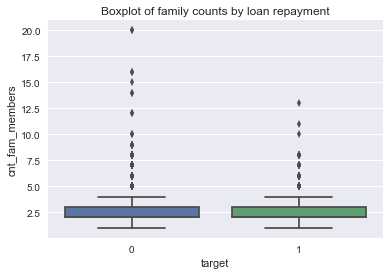

In [48]:
plt.title("Boxplot of family counts by loan repayment")
sns.boxplot(x='target',y='cnt_fam_members',data=df)

Not much is visible from this, but lets bin the family sizes into small, medium, and big. Small will be 3 members and below, medium 4-6, and 7 and up is larger

In [49]:
def sepFamilySize(x):
    if x<=3:
        return 'small'
    elif 4 <= x <= 6:
        return 'medium'
    else:
        return 'large'

In [50]:
df['Family_Size'] = df.cnt_fam_members.apply(sepFamilySize)
df.Family_Size.value_counts()

small     278805
medium     28583
large        123
Name: Family_Size, dtype: int64

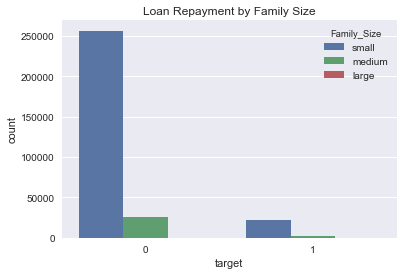

In [51]:
plt.title('Loan Repayment by Family Size')
sns.countplot(x='target',hue='Family_Size',data=df)

This method isnt telling us what we need to know. Lets get rid of the medium bin, and separate from small and not small

In [52]:
def sepFamilySize(x):
    if x<=3:
        return 'small'
    else:
        return 'large'

In [53]:
df['Family_Size'] = df.cnt_fam_members.apply(sepFamilySize)
df.Family_Size.value_counts()

small    278805
large     28706
Name: Family_Size, dtype: int64

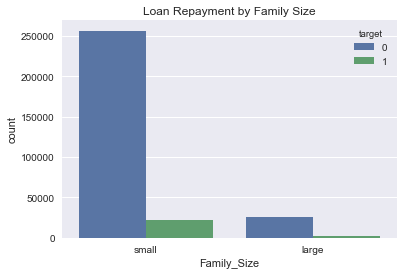

In [54]:
plt.title('Loan Repayment by Family Size')
sns.countplot(x='Family_Size',hue='target',data=df)

Even this binning isnt showing us anything useful. It looks like this feature isnt that useful.

## Feature Analysis: Occupation Type

In [55]:
df.head()

,Unnamed: 0,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_income_type,name_education_type,name_family_status,name_housing_type,occupation_type,days_employed,cnt_fam_members,organization_type,Family_Size
0,0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,-637,1.0,Business Entity Type 3,small
1,1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,Core staff,-1188,2.0,School,small
2,2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,-225,1.0,Government,small
3,3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,-3039,2.0,Business Entity Type 3,small
4,4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,-3038,1.0,Religion,small


It also stands to reason that the the occupation of the loan recipient would determine whether or not they can repay the loan. Lets see if thats true:

In [56]:
df.occupation_type.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: occupation_type, dtype: int64

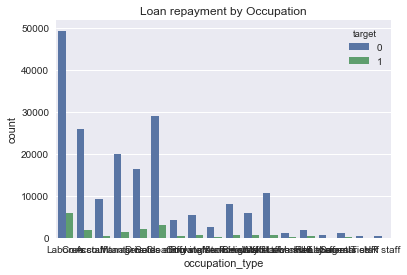

In [57]:
plt.title('Loan repayment by Occupation')
sns.countplot(x='occupation_type',hue='target',data=df)

Hard to see anything useful with so many categories. Lets combine some of the more similar jobs into categories

In [58]:
def sepOccupationTypes(x):
    low_skill = ['Laborers','Low-skill Laborers','Security staff','Drivers']
    service = ['Cooking staff','Cleaning staff','Private service staff','Waiters/barmen staff','Realty agents']
    skill_staff = ['Sales staff','Core staff','Managers','High skill tech staff','Accountants','Medicine staff',\
                  'HR staff','IT staff']
    
    if x in low_skill:
        return "Unskilled"
    if x in service:
        return "Service Industry"
    if x in skill_staff:
        return "Skilled"
    if x == 'NaN':
        return 'Unemployed'

In [59]:
df['Job_Types'] = df.occupation_type.apply(sepOccupationTypes)
df.Job_Types.value_counts()

Skilled             111862
Unskilled            82603
Service Industry     15350
Name: Job_Types, dtype: int64

In [60]:
df['Job_Types'] = df.Job_Types.fillna('Unemployed')

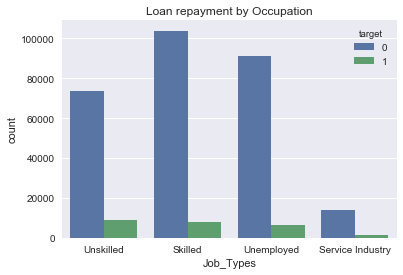

In [61]:
plt.title('Loan repayment by Occupation')
sns.countplot(x='Job_Types',hue='target',data=df)

Looking at this data, it seems that skilled jobs mean that people repay their loans more often. Ther service industry seems to have more problems repaying loans, which is expected giving the general low wages in those occupations.

## Feature Analysis: Organization Type

In [62]:
df.organization_type.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

This is way too many categories. Lets simplify by ignoring sub-types for now:

In [63]:
def cleanOrgTypes(x):
    if ':' in x:
        x = x.split(': ')
        x = x[0]
        
    if 'Business' in x:
        x = 'Business Entity'
    
    edu = ['School','Kindergarten','University']
    if x in edu:
        x = 'Education'
    
    real_estate = ['Realtor','Housing']
    if x in real_estate:
        x = 'Real Estate'
    
    hosp = ['Hotel','Restaurant','Cleaning']
    if x in hosp:
        x = 'Hospitality'
    
    security = ['Security','Security Ministries']
    if x in security:
        x = 'Security'
    
    if x == 'XNA':
        x = "Unemployed"
        
    fin = ['Bank','Insurance']
    if x in fin:
        x = 'Finance'
    
    other = ['Electricity','Insurance','Telecom','Emergency','Advertising','Culture','Mobile',\
            'Legal Services','Religion']
    if x in other:
        x = 'Other'
    
    return x

In [64]:
df['organization_type'] = df.organization_type.apply(cleanOrgTypes)
df.organization_type.value_counts()

Business Entity    84529
Unemployed         55374
Self-employed      38412
Other              20285
Education          17100
Trade              14315
Industry           14311
Medicine           11193
Government         10404
Transport           8990
Construction        6721
Security            5221
Real Estate         3354
Finance             3104
Hospitality         3037
Military            2634
Agriculture         2454
Police              2341
Postal              2157
Services            1575
Name: organization_type, dtype: int64

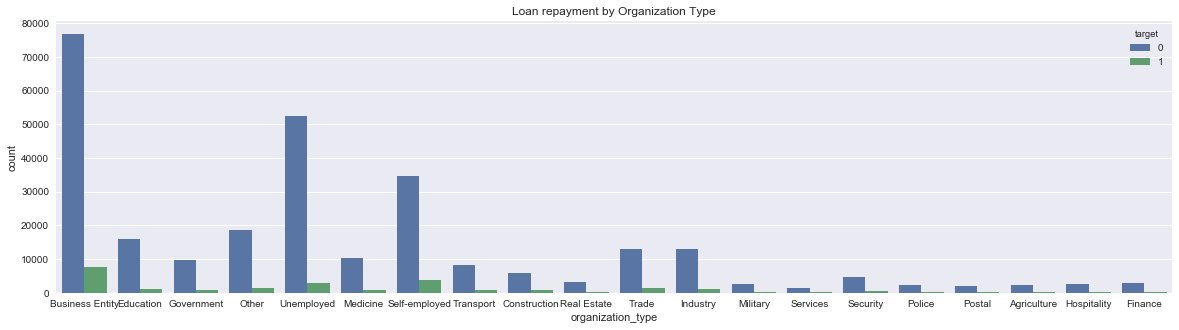

In [65]:
plt.figure(figsize=(20,5))
plt.title('Loan repayment by Organization Type')
sns.countplot(x='organization_type',hue='target',data=df)

In [66]:
df.target.value_counts()

0    282686
1     24825
Name: target, dtype: int64

## Feature Analysis: Income per Family Member

We already looked at the number of family members and realized it wasn't that useful, but what we didn't see was how much income was being split among those family members, which gives us a better picture of the family finances.

In [67]:
df.head()

,Unnamed: 0,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,...,name_income_type,name_education_type,name_family_status,name_housing_type,occupation_type,days_employed,cnt_fam_members,organization_type,Family_Size,Job_Types
0,0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,-637,1.0,Business Entity,small,Unskilled
1,1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,State servant,Higher education,Married,House / apartment,Core staff,-1188,2.0,Education,small,Skilled
2,2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,-225,1.0,Government,small,Unskilled
3,3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,-3039,2.0,Business Entity,small,Unskilled
4,4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,-3038,1.0,Other,small,Skilled


In [68]:
df['Income_per_Member'] = df['amt_income_total']/df['cnt_fam_members']
df.head()

,Unnamed: 0,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,...,name_education_type,name_family_status,name_housing_type,occupation_type,days_employed,cnt_fam_members,organization_type,Family_Size,Job_Types,Income_per_Member
0,0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Secondary / secondary special,Single / not married,House / apartment,Laborers,-637,1.0,Business Entity,small,Unskilled,202500.0
1,1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Higher education,Married,House / apartment,Core staff,-1188,2.0,Education,small,Skilled,135000.0
2,2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Secondary / secondary special,Single / not married,House / apartment,Laborers,-225,1.0,Government,small,Unskilled,67500.0
3,3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Secondary / secondary special,Civil marriage,House / apartment,Laborers,-3039,2.0,Business Entity,small,Unskilled,67500.0
4,4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Secondary / secondary special,Single / not married,House / apartment,Core staff,-3038,1.0,Other,small,Skilled,121500.0


In [69]:
df.Income_per_Member.describe()

count    3.075090e+05
mean     9.310588e+04
std      1.013734e+05
min      2.812500e+03
25%      4.725000e+04
50%      7.500000e+04
75%      1.125000e+05
max      3.900000e+07
Name: Income_per_Member, dtype: float64

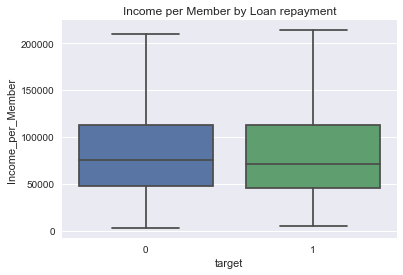

In [70]:
plt.title("Income per Member by Loan repayment")
sns.boxplot(x = 'target',y='Income_per_Member',data=df,showfliers=False)


## Feature Analysis: Housing Type

In [71]:
df.name_education_type.value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: name_education_type, dtype: int64

In [72]:
df.name_housing_type.value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: name_housing_type, dtype: int64

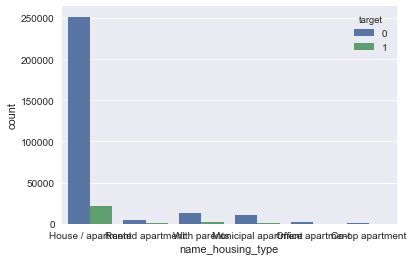

In [73]:
sns.countplot(x = 'name_housing_type',hue = 'target',data=df)

Lets simplify this feature with own question, do you own your own house or not?

In [74]:
def ownHouse(x):
    if x == 'House / apartment':
        return 'Yes'
    else:
        return 'No'

In [75]:
df['Owns_House'] = df.name_housing_type.apply(ownHouse)
df.Owns_House.value_counts()

Yes    272868
No      34643
Name: Owns_House, dtype: int64

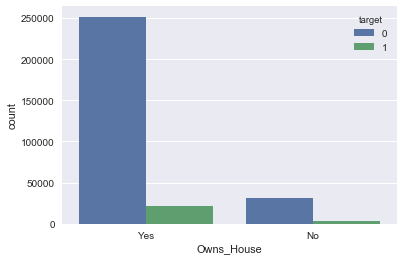

In [76]:
sns.countplot(x = 'Owns_House',hue = 'target',data=df)

In [77]:
df.head()

,Unnamed: 0,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,...,name_family_status,name_housing_type,occupation_type,days_employed,cnt_fam_members,organization_type,Family_Size,Job_Types,Income_per_Member,Owns_House
0,0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Single / not married,House / apartment,Laborers,-637,1.0,Business Entity,small,Unskilled,202500.0,Yes
1,1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Married,House / apartment,Core staff,-1188,2.0,Education,small,Skilled,135000.0,Yes
2,2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Single / not married,House / apartment,Laborers,-225,1.0,Government,small,Unskilled,67500.0,Yes
3,3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Civil marriage,House / apartment,Laborers,-3039,2.0,Business Entity,small,Unskilled,67500.0,Yes
4,4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Single / not married,House / apartment,Core staff,-3038,1.0,Other,small,Skilled,121500.0,Yes


In [78]:
df.columns

Index(['Unnamed: 0', 'target', 'name_contract_type', 'code_gender',
       'flag_own_car', 'flag_own_realty', 'cnt_children', 'amt_income_total',
       'amt_credit', 'amt_annuity', 'amt_goods_price', 'name_income_type',
       'name_education_type', 'name_family_status', 'name_housing_type',
       'occupation_type', 'days_employed', 'cnt_fam_members',
       'organization_type', 'Family_Size', 'Job_Types', 'Income_per_Member',
       'Owns_House'],
      dtype='object')

## Feature Analysis: Name Income Type

In [79]:
df.name_income_type.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: name_income_type, dtype: int64

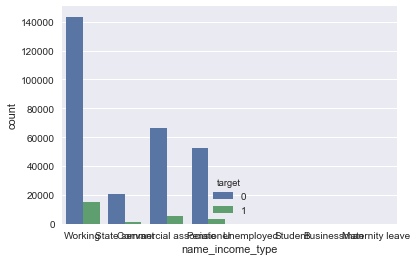

In [80]:
sns.countplot(x = 'name_income_type',hue = 'target',data=df)

In [81]:
def sortIncomeType(x):
    not_working = ['Pensioner','Unemployed','Student','Maternity leave']
    if x in not_working:
        return 'Not Working'
    elif x == 'Businessman':
        return 'Working'
    else:
        return x

In [82]:
df['Income_Cats'] = df.name_income_type.apply(sortIncomeType)

In [83]:
df.Income_Cats.value_counts()

Working                 158784
Commercial associate     71617
Not Working              55407
State servant            21703
Name: Income_Cats, dtype: int64

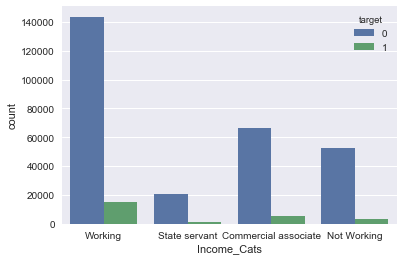

In [84]:
sns.countplot(x = 'Income_Cats',hue = 'target',data=df)

In [85]:
df.head()

,Unnamed: 0,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,...,name_housing_type,occupation_type,days_employed,cnt_fam_members,organization_type,Family_Size,Job_Types,Income_per_Member,Owns_House,Income_Cats
0,0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,House / apartment,Laborers,-637,1.0,Business Entity,small,Unskilled,202500.0,Yes,Working
1,1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,House / apartment,Core staff,-1188,2.0,Education,small,Skilled,135000.0,Yes,State servant
2,2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,House / apartment,Laborers,-225,1.0,Government,small,Unskilled,67500.0,Yes,Working
3,3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,House / apartment,Laborers,-3039,2.0,Business Entity,small,Unskilled,67500.0,Yes,Working
4,4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,House / apartment,Core staff,-3038,1.0,Other,small,Skilled,121500.0,Yes,Working


In [86]:
df.columns

Index(['Unnamed: 0', 'target', 'name_contract_type', 'code_gender',
       'flag_own_car', 'flag_own_realty', 'cnt_children', 'amt_income_total',
       'amt_credit', 'amt_annuity', 'amt_goods_price', 'name_income_type',
       'name_education_type', 'name_family_status', 'name_housing_type',
       'occupation_type', 'days_employed', 'cnt_fam_members',
       'organization_type', 'Family_Size', 'Job_Types', 'Income_per_Member',
       'Owns_House', 'Income_Cats'],
      dtype='object')

## Feature Analysis: Family Status

In [87]:
df.name_family_status.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: name_family_status, dtype: int64

In [88]:
def sortMarriedStatus(x):
    marry = ['Married','Civil marriage']
    if x in marry:
        return 'Married'
    else:
        return 'Not Married'

In [89]:
df['Married_Flag'] = df.name_family_status.apply(sortMarriedStatus)

In [90]:
df.head()

,Unnamed: 0,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,...,occupation_type,days_employed,cnt_fam_members,organization_type,Family_Size,Job_Types,Income_per_Member,Owns_House,Income_Cats,Married_Flag
0,0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Laborers,-637,1.0,Business Entity,small,Unskilled,202500.0,Yes,Working,Not Married
1,1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Core staff,-1188,2.0,Education,small,Skilled,135000.0,Yes,State servant,Married
2,2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Laborers,-225,1.0,Government,small,Unskilled,67500.0,Yes,Working,Not Married
3,3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Laborers,-3039,2.0,Business Entity,small,Unskilled,67500.0,Yes,Working,Married
4,4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Core staff,-3038,1.0,Other,small,Skilled,121500.0,Yes,Working,Not Married


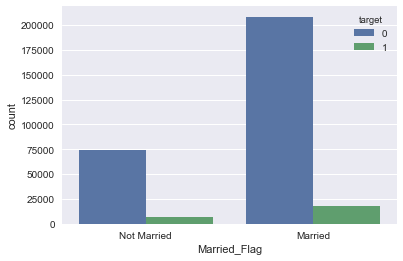

In [91]:
sns.countplot(x = 'Married_Flag',hue = 'target',data=df)

## Model Building and Prediction

In [92]:
df.columns

Index(['Unnamed: 0', 'target', 'name_contract_type', 'code_gender',
       'flag_own_car', 'flag_own_realty', 'cnt_children', 'amt_income_total',
       'amt_credit', 'amt_annuity', 'amt_goods_price', 'name_income_type',
       'name_education_type', 'name_family_status', 'name_housing_type',
       'occupation_type', 'days_employed', 'cnt_fam_members',
       'organization_type', 'Family_Size', 'Job_Types', 'Income_per_Member',
       'Owns_House', 'Income_Cats', 'Married_Flag'],
      dtype='object')

In [94]:
features = ['code_gender','flag_own_car', 'flag_own_realty','organization_type', 'Family_Size', 'Job_Types',\
            'Owns_House', 'Income_Cats', 'Married_Flag']

In [95]:
X = df[features]
y = df.target

In [96]:
#One Hot Encoding
X = pd.get_dummies(X)

In [99]:
from sklearn.cross_validation import train_test_split

C:\Users\amuth\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [100]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=2)

In [116]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.svm import OneClassSVM
from sklearn.linear_model import LogisticRegression

In [106]:
#Initialize the GBC model
gbc = GradientBoostingClassifier(random_state=2)
#Check Accuracy of the model
model = gbc.fit(X_train,y_train)
pred = model.predict(X_test)
gbc_score_base = accuracy_score(pred,y_test)
print('Accuracy of base GBC is: '+str(gbc_score_base))

Accuracy of base GBC is: 0.9190032925490834


In [107]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.92      1.00      0.96    113043
          1       0.00      0.00      0.00      9962

avg / total       0.84      0.92      0.88    123005



In [104]:
#Initialize the Random Forest Model
rfm = RandomForestClassifier(random_state=2)
model = rfm.fit(X_train,y_train)
pred = model.predict(X_test)
rfm_acc_score = accuracy_score(pred,y_test)
print('Accuracy of base RFM is: '+str(rfm_acc_score))

Accuracy of base RFM is: 0.9174179911385716


In [105]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.92      1.00      0.96    113043
          1       0.10      0.00      0.01      9962

avg / total       0.85      0.92      0.88    123005



In [109]:
#Initialize the KMeans model

In [112]:
kmeans = KMeans(n_clusters=2,random_state=2,n_init=100)
model = kmeans.fit(X_train,y_train)
pred = model.predict(X_test)
rfm_acc_score = accuracy_score(pred,y_test)
print('Accuracy is: '+str(rfm_acc_score))
print(classification_report(y_test, pred))

Accuracy of base RFM is: 0.6359416283890899
             precision    recall  f1-score   support

          0       0.93      0.65      0.77    113043
          1       0.10      0.43      0.16      9962

avg / total       0.86      0.64      0.72    123005

